Engy-5050 Spring 2022 UMass Lowell; Prof. V. F. de Almeida **14Jan2022**

# 05. Neutron Diffusion from a Sphere Source w/ Reflector
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Hmtrx}{\boldsymbol{\mathsf{H}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Lcal}{\mathscr{L}}
$

---
## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Vacuum Boundary Conditions](#p1)
1. [Alternative Problem Statement](#p2)
1. [Galerkin's Method w/ Finite Element Basis Functions](#p3)
1. [Reflected Source w/ Vacuum BC](#reflected)
   + [Data](#data)
   + [Finite Element Lagrange Basis Functions](#fembf)
   + [Results](#results)
---

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D, spherical coordinates, neutron diffusion from a sphere source problem using two regions.

## [Boundary-Value Problem Statement](#toc)<a id="p1"></a>

Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find $u_1:[0,R_s]\subset\Reals\rightarrow\Reals$, $u_2:[R,R_r]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D_1\, r^2 u_1'\bigr)'(r) - \Sigma_{a,1}\,u_1(r) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_s[, \\
 -\frac{1}{r^2}\bigl(-D_2\, r^2 u_2'\bigr)'(r) - \Sigma_{a,2}\,u_2(r) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad r\in\ ]R_s,R_r[, \\
 q_{1,n}(0) &= 0, \\
 q_{2,n}(R_r) &= \frac{u_2(R_r)}{2}, \\
 u_1(R_s) &= u_2(R_s), \\
 q_{1,n}(R_s) &= q_{2,n}(R_s), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(r) = \flux_i(r)\cdot\normal(r) = -D_i\,u_i'(r)\,\rhat \cdot \normal(r) \ \forall \ i=1,2$.

## [Alternative Boundary-Value Problem Statement](#toc)<a id="p2"></a>

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find $u:[0,R_r]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D(r)\, r^2 u'\bigr)'(r) - \Sigma_a(r)\,u(r) + s_0(r) &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_r[, \\
 q_n(0) &= 0, \\
 q_n(R_r) &= \frac{u(R_r)}{2}. \\
\end{align*}
   
Given data: diffusion coefficient, $D(r)$, macroscopic absorption cross section, $\Sigma_a(r)$, source $s_0(r)$, and normal flux boundary conditions. Where $q_n(r) = \flux(r)\cdot\normal(r) = -D(r)\,u_i'(r)\,\rhat \cdot \normal(r)$.

## [Galerkin Method w/ Finite Element Basis Functions](#toc)<a id="p3"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([0,R_r]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) - q_n(R_r)\,v(R_r)\,R^2_r &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([0,R_r]\bigr), 
\end{align*}

where $H^1\!\bigl([0,R_r]\bigr) := \bigl\{ u:[0,R_r]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional subspace of $H^1\!\bigl([0,R_r]\bigr)$, say $V_N([0,R_r]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([0,R_r]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(0,R_r)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_r)\,\phi_i(R_b)\,R^2_r  $
  + $b_i = (s_0,\phi_i) $
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm). In addition, in spherical coordinates, the inner products read

\begin{align*}
\bigl(-D\, u',v'\bigr) &= \int\limits_0^{R_r} D(r)\, u'(r)\,v'(r)\, r^2\,dr  \\
\bigl(\Sigma_a\,u,v\bigr) &= \int\limits_0^{R_r} \Sigma_a(r)\,u(r)\,v(r)\,r^2\,dr \\
\bigl(s_0,v\bigr) &= \int\limits_0^{R_r} s_0(r)\,v(r)\,r^2\,dr
\end{align*}

## [Reflected Source](#toc)<a id="reflected"></a>

Consider an inner sphere source surrounded by an annular region exposed to vacuum. 

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
r_0 = 0*unit.cm 
r_s = 5*unit.cm
r_r = 10*unit.cm

In [3]:
'''Domain'''
def show_domain(r_s, r_r):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = r_s
    radius_o = r_r
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1), off_screen=True) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.4,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(1.8)
    cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
plo = show_domain(r_s, r_r)

ViewInteractiveWidget(height=400, layout=Layout(height='auto', width='100%'), width=1000)

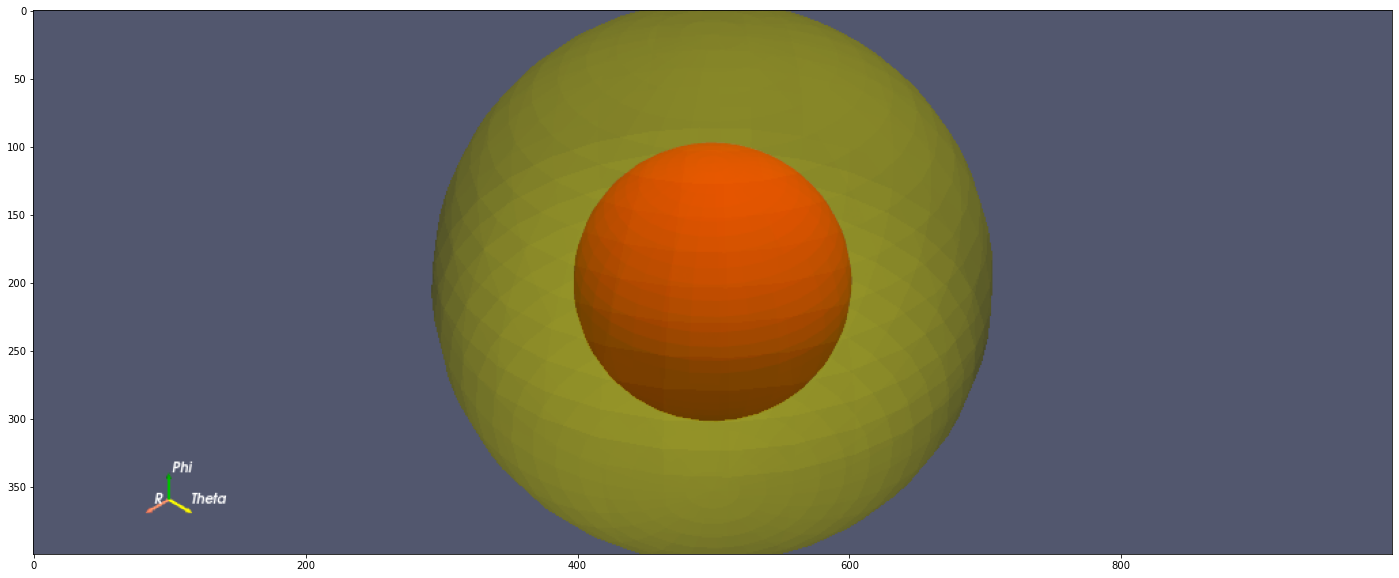

In [5]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(100, 10))
plt.imshow(plo.image)
plt.show()

### [Data](#toc)<a id="data"></a>

Solve problem with parameter values:

> + a, b, s
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{nR_r}$


In [6]:
'''Parameters and data'''
import math

# Source
diffusion_coeff_1 = 1.44*unit.cm
sigma_a_1 = 0.1/unit.cm
source_1 = 100./unit.cm**3/unit.second

# Reflector
diffusion_coeff_2 = 1.85*unit.cm
sigma_a_2 = 0.01226/unit.cm
source_2 = 0./unit.cm**3/unit.second

In [7]:
'''Diffusion lengths'''

import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 3.795e+00
L2 [cm] = 1.228e+01


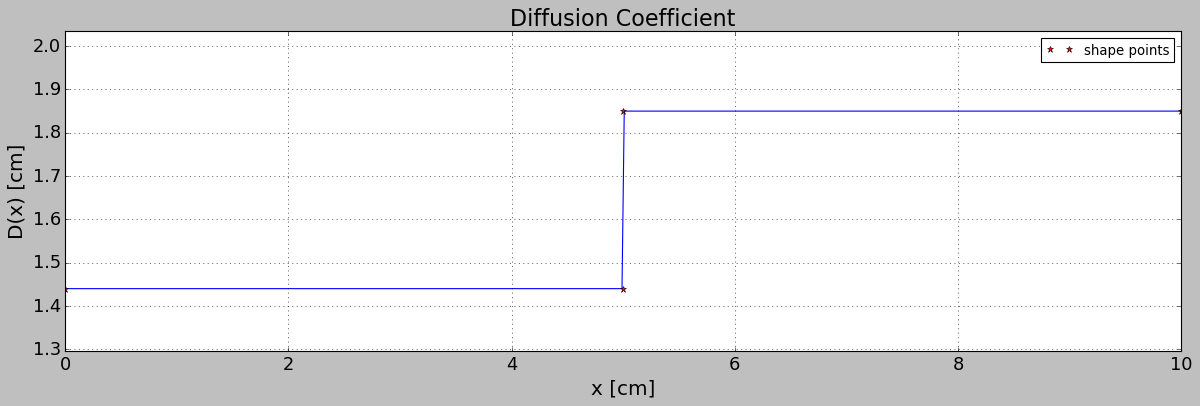

In [8]:
'''Diffusion coefficient function'''
from engy_5310.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_s, diffusion_coeff_1), 
             (r_s, diffusion_coeff_2), (r_r, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

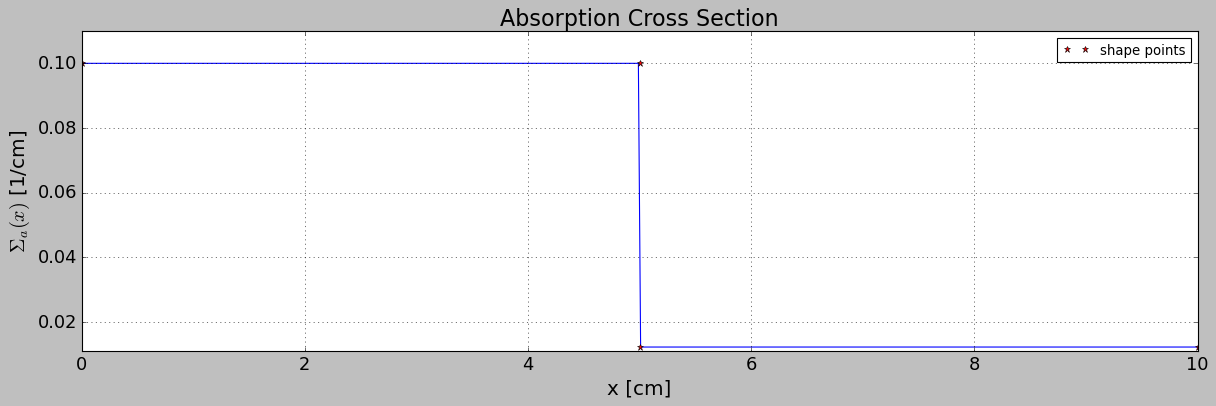

In [9]:
'''Absoption cross section function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, sigma_a_1), (r_s, sigma_a_1), 
             (r_s, sigma_a_2), (r_r, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

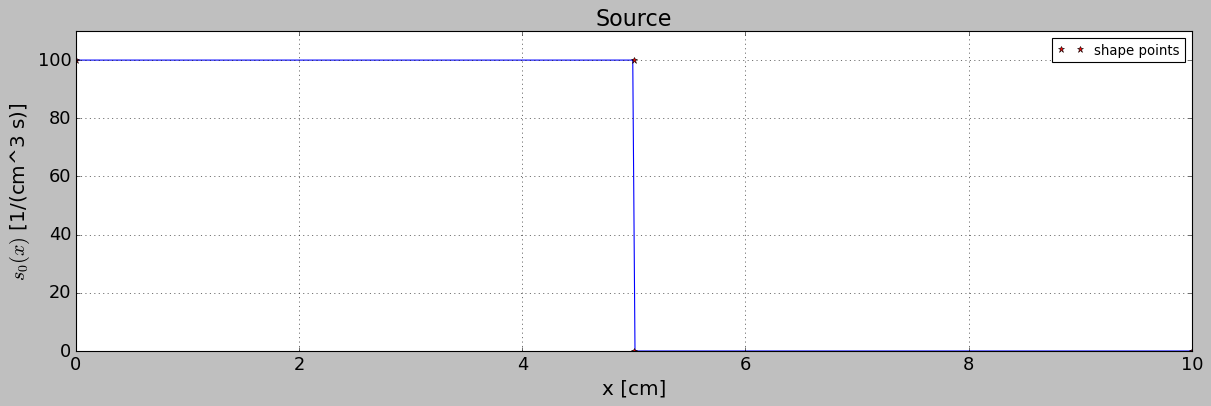

In [10]:
'''Source function'''
from engy_5310.toolkit import TargetFunction  

shape_pts = [(r_0, source_1), (r_s, source_1), 
             (r_s, source_2), (r_r, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### [Finite Element Basis Functions](#toc)<a id="fembf"></a>

Specify basis functions distribution on the material domain and degree.

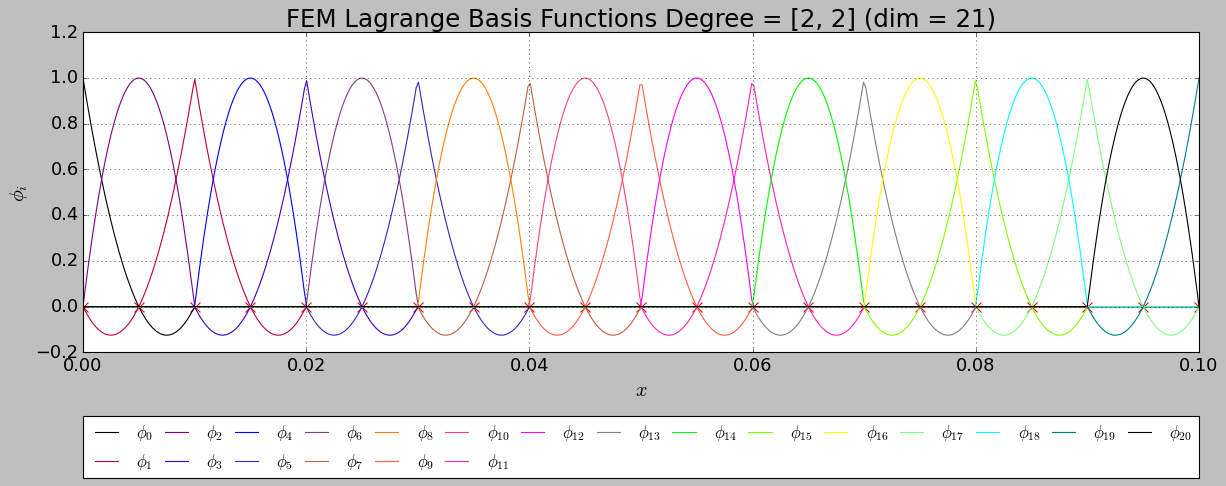

In [11]:
'''Build basis functions'''
from engy_5310.toolkit import LagrangeFEMBasis 

degree = [2,2]
n_elem = [5,5]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_s, r_r])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = \bigl(D\,\phi'_j,\phi'_i\bigr) + \bigl(\Sigma_a\,\phi_j,\phi_i\bigr) + 1/2\,\phi_j(R_r)\,\phi_i(R_b)\,R^2_r $

In [12]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='spherical')
sa_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='spherical')

r_mtrx_b = femlb.boundary_inner_product_matrix('right', lambda x:1/2*r_r**2, 'u', 'v')

a_mtrx = d_mtrx + sa_mtrx + r_mtrx_b

In [13]:
try:    
    from engy_5310.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
21 (21, 21)


 + $b_i = (s_0,\phi_i)$

In [14]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='spherical')

b_vec = s_vec

In [15]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [16]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [17]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

### [Results](#toc)<a id="results"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [22]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  u_legend='Solution w/ Neumann BC', 
                  q_legend='Flux w/ Neumann BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

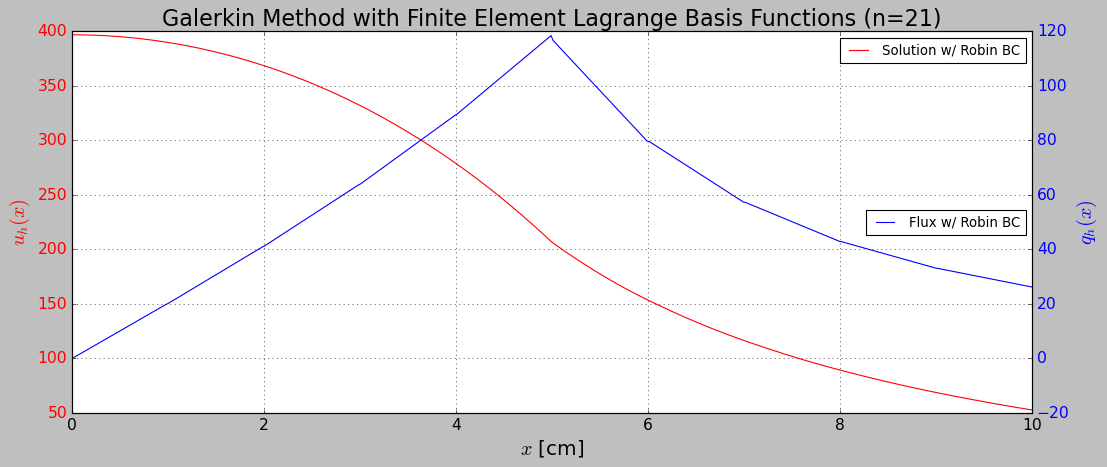

In [24]:
n_pts = 500
x = np.linspace(0, r_r, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values, u_legend='Solution w/ Robin BC', q_legend='Flux w/ Robin BC')

In [25]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Rr) [cm^2/s]= ', u_star(r_r)*unit.cm**2*unit.second)
print('')
print("u^*'_N")
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Rr) [cm/s]= ", u_prime_star(r_r)*unit.cm*unit.second)
print('')
print('x=0')
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N:
u^*_N(0) [cm^2/s]=  [396.86476]   u^*_N(Rr) [cm^2/s]=  [52.72614]

u^*'_N
u^*'_N(0) [cm/s]=  [555.66736]  u^*'_N(Rr) [cm/s]=  [-141540.53134]

x=0
u^*_N(0) [cm^2/s]=  [396.86476]
u^*'_N(0) [cm/s]=  [555.66736]


In [26]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [0.08002]


In [32]:
'''Flux at right boundary'''

print('q_nr given    [cm^2/s]= ', u_star(r_r)*unit.cm**2*unit.second/2)
print('q_nr computed [cm^2/s]= ', -diffusion_coeff(r_r)*u_prime_star(r_r)*unit.cm**2*unit.second)
print('flux error [%]= ',(-diffusion_coeff(r_r)*u_prime_star(r_r) - u_star(r_r)/2)/(u_star(r_r)/2)*100)

q_nr given    [cm^2/s]=  [26.36307]
q_nr computed [cm^2/s]=  [26.185]
flux error [%]=  [-0.67546]


In [33]:
x_vec = np.linspace(0, r_r, 40)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

x [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +3.96865e+02     -8.00161e-02
+2.56410e-01   +3.96415e+02     +5.12616e+00
+5.12821e-01   +3.95039e+02     +1.03323e+01
+7.69231e-01   +3.92736e+02     +1.55385e+01
+1.02564e+00   +3.89507e+02     +2.06518e+01
+1.28205e+00   +3.85348e+02     +2.60715e+01
+1.53846e+00   +3.80223e+02     +3.14913e+01
+1.79487e+00   +3.74133e+02     +3.69110e+01
+2.05128e+00   +3.67080e+02     +4.23002e+01
+2.30769e+00   +3.59026e+02     +4.81654e+01
+2.56410e+00   +3.49927e+02     +5.40305e+01
+2.82051e+00   +3.39784e+02     +5.98957e+01
+3.07692e+00   +3.28598e+02     +6.58403e+01
+3.33333e+00   +3.16291e+02     +7.24019e+01
+3.58974e+00   +3.02814e+02     +7.89634e+01
+3.84615e+00   +2.88170e+02     +8.55250e+01
+4.10256e+00   +2.72353e+02     +9.23355e+01
+4.35897e+00   +2.55240e+02     +9.98791e+01
+4.61538e+00   +2.36783e+02     +1.07423e+02
+4.87179e+00   +2.16984e+02     +1.14966e+02
+5.12821e+00   +1.98635e+02     +1.12235e+02
+5.38462